<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/Pandas_Table_Conversion_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 8
- Convert the dataset "table1" into a narrow table with
the following shape:
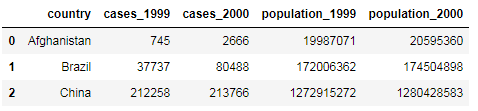

#1. Create Table 1

In [51]:
import pandas as pd

table1 = pd.DataFrame({"country" : ["Afghanistan", "Afghanistan", "Brazil", "Brazil", "China", "China"],
                   "year" : [1999, 2000,1999,2000,1999,2000],
                   "cases" : [745, 266,37737,80488,212258,213766],
                   "population" : [19987071,20595360,172006362,174504898,1272915272,1280428583]})

df = table1
df

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,266,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


#2. Melt
- We keep "country" and "year" as our id_variables (don't change)
- We melt all others 
  - cases and
  - population

Now we have a dataframe that shows us each country in a given year and the given cases and population in unique rows.

In [52]:
df = df.melt(id_vars = ["country", "year"],
        var_name="column",
        value_name ="data")
df

,country,year,column,data
0,Afghanistan,1999,cases,745
1,Afghanistan,2000,cases,266
2,Brazil,1999,cases,37737
3,Brazil,2000,cases,80488
4,China,1999,cases,212258
5,China,2000,cases,213766
6,Afghanistan,1999,population,19987071
7,Afghanistan,2000,population,20595360
8,Brazil,1999,population,172006362
9,Brazil,2000,population,174504898


# 3. Create a new "data_year" row
We proceede by creating a new row that links together the type of data we have and the year.

In [53]:
df["data_year"] = df.apply(lambda row: "%s_%s" % (row["column"], row["year"]), axis =1)
df

,country,year,column,data,data_year
0,Afghanistan,1999,cases,745,cases_1999
1,Afghanistan,2000,cases,266,cases_2000
2,Brazil,1999,cases,37737,cases_1999
3,Brazil,2000,cases,80488,cases_2000
4,China,1999,cases,212258,cases_1999
5,China,2000,cases,213766,cases_2000
6,Afghanistan,1999,population,19987071,population_1999
7,Afghanistan,2000,population,20595360,population_2000
8,Brazil,1999,population,172006362,population_1999
9,Brazil,2000,population,174504898,population_2000


# 4. Create a pivot table

In the last step we fix the country as our index and grab the unique values of our newly created "data_column" and use them as our new columns.

We reset the index in order to arrive at the final clean Table

In [54]:
df1 = df.pivot_table(index = "country",
              columns = "data_year",
               values = "data").reset_index()
df1

data_year,country,cases_1999,cases_2000,population_1999,population_2000
0,Afghanistan,745,266,19987071,20595360
1,Brazil,37737,80488,172006362,174504898
2,China,212258,213766,1272915272,1280428583


We could run the code below, if we wanted to switch the order of our columns

In [57]:
df1.columns = ["country","population_1999",	"population_2000","cases_1999",	"cases_2000" ]
df1

,country,population_1999,population_2000,cases_1999,cases_2000
0,Afghanistan,745,266,19987071,20595360
1,Brazil,37737,80488,172006362,174504898
2,China,212258,213766,1272915272,1280428583
